### 1. Import data and revelant packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X_train = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/training_set.csv')
X_train.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,20,1487,8,-0.028291,37,11,2,1,122.714286,1.384051,103.900061,0.333809,1,0.056981
1,21,668,6,0.130119,40,1,2,0,-1.000000,1.358962,103.763673,-0.261162,2,0.145982
2,23,291,3,-0.030116,24,1,2,0,169.428571,1.383134,103.744511,-0.092774,1,0.073223
3,18,1734,4,-0.028981,26,4,2,0,163.857143,1.355347,103.960666,0.109292,1,0.052676
4,20,1932,4,-0.029067,37,11,2,0,122.714286,1.446986,103.799769,0.075614,1,0.083862


In [3]:
y_train = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/training_labels.csv')
y_train.head()

,price
0,-0.268334
1,0.137525
2,-0.392790
3,-0.319220
4,-0.322286


In [4]:
X_test = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/testing_set.csv')
X_test.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,27,1972,9,-0.026896,18,2,2,0,64.000000,1.425057,103.844262,-0.025418,2,0.071470
1,27,1988,2,-0.030849,18,2,2,0,64.000000,1.428767,103.832604,-0.407098,1,0.071470
2,20,141,4,-0.025876,37,11,2,0,122.714286,1.348742,103.711118,-0.025418,1,0.064371
3,19,1452,9,-0.026809,45,5,2,0,202.142857,1.401083,103.898665,-0.115225,3,0.083045
4,3,351,6,-0.026451,24,16,2,0,193.285714,1.303114,103.797330,-0.811229,2,0.091372


In [5]:
y_test = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/testing_labels.csv')
y_test.head()

,price
0,0.014909
1,-0.415542
2,-0.291631
3,0.091544
4,-0.086249


In [6]:
df = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/combined.csv')
df.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,2002,11,999.00,5500000.0,27,6,2,0,-1.0,1.282130,103.786879,524.3,0,0.129813
1,5,2002,11,999.00,5000000.0,27,6,2,0,-1.0,1.282130,103.786879,308.0,0,0.064396
2,5,2002,11,999.00,4750000.0,27,6,2,0,-1.0,1.282130,103.786879,314.0,0,0.064396
3,5,1322,15,999.00,2630000.0,27,6,2,2,-1.0,1.292047,103.768591,159.3,0,0.129813
4,4,375,6,84.92,2800000.0,11,3,2,0,-1.0,1.244208,103.827487,223.0,1,0.074654


### 2. Examine and Explore Data

In [7]:
# Examine entire dataset 
df.describe()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
count,132607.000000,132607.000000,132607.000000,132607.000000,1.326070e+05,132607.000000,132607.000000,132607.0,132607.000000,132607.000000,132607.000000,132607.000000,132607.000000,132607.000000,132607.000000
mean,18.193391,1018.356746,4.557957,241.866623,9.562546e+05,32.928767,7.036763,2.0,0.121479,124.066175,1.358879,103.845187,114.282205,2.038180,0.072803
std,5.345945,658.598106,2.767148,5501.373380,1.622821e+06,9.401591,4.202423,0.0,0.362613,58.140970,0.043521,0.068382,88.556745,1.391485,0.018810
min,1.000000,0.000000,0.000000,2.580000,4.000000e+04,10.000000,1.000000,2.0,0.000000,-1.000000,1.239641,103.687191,24.000000,0.000000,-0.025054
25%,16.000000,355.000000,3.000000,67.080000,3.700000e+05,25.000000,4.000000,2.0,0.000000,78.928571,1.326058,103.793446,84.000000,1.000000,0.056981
50%,20.000000,1063.000000,4.000000,80.250000,5.000000e+05,37.000000,5.000000,2.0,0.000000,122.714286,1.355269,103.847709,102.000000,2.000000,0.069542
75%,20.000000,1581.000000,6.000000,93.330000,9.350000e+05,37.000000,11.000000,2.0,0.000000,167.714286,1.389063,103.898665,121.000000,3.000000,0.083862
max,28.000000,2004.000000,15.000000,999973.000000,1.090000e+08,51.000000,16.000000,2.0,2.000000,226.000000,1.460839,103.987293,4836.400000,17.000000,0.229515


In [8]:
df.dtypes

district              int64
street                int64
propertyType          int64
remaining_lease     float64
price               float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_area_sqm      float64
floor_range           int64
sentiment           float64
dtype: object

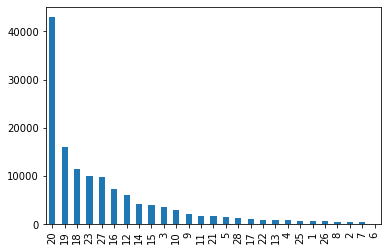

In [9]:
# After label encoding
df['district'].value_counts().plot(kind='bar')

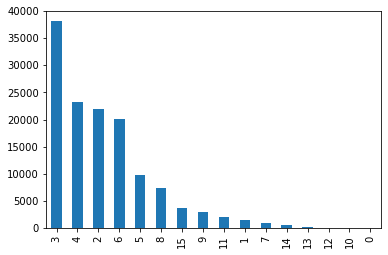

In [10]:
# After Label Encoding
df['propertyType'].value_counts().plot(kind='bar')

In [11]:
df['floor_area_sqm'].describe()

count    132607.000000
mean        114.282205
std          88.556745
min          24.000000
25%          84.000000
50%         102.000000
75%         121.000000
max        4836.400000
Name: floor_area_sqm, dtype: float64

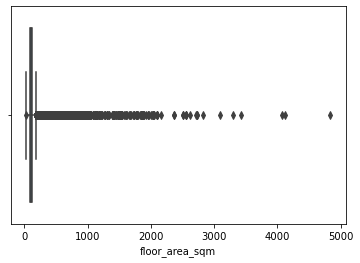

In [12]:
sns.boxplot(x=df['floor_area_sqm'])

In [13]:
df['price'].describe()

count    1.326070e+05
mean     9.562546e+05
std      1.622821e+06
min      4.000000e+04
25%      3.700000e+05
50%      5.000000e+05
75%      9.350000e+05
max      1.090000e+08
Name: price, dtype: float64

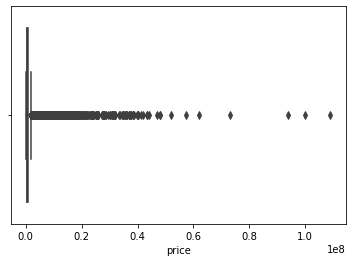

In [14]:
sns.boxplot(x=df['price'])

### 3. Plot charts to see if there are relations between each variable with price

#### 3.1 Categorical Variables
- district 
- street
- propertyType

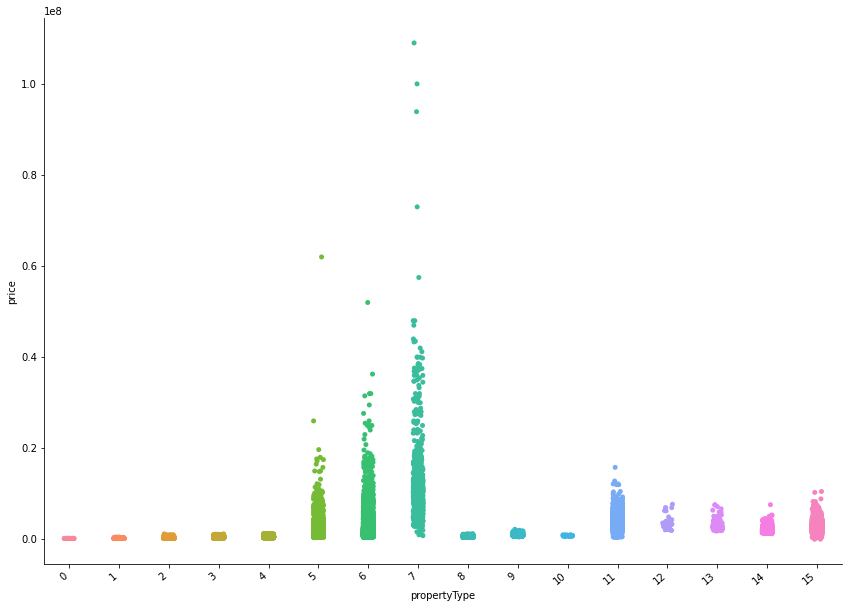

In [15]:
# Relationship between propertyType and price 
import seaborn as sns
ax = sns.catplot(data=df, x='propertyType', y='price', height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation=40, ha="right")

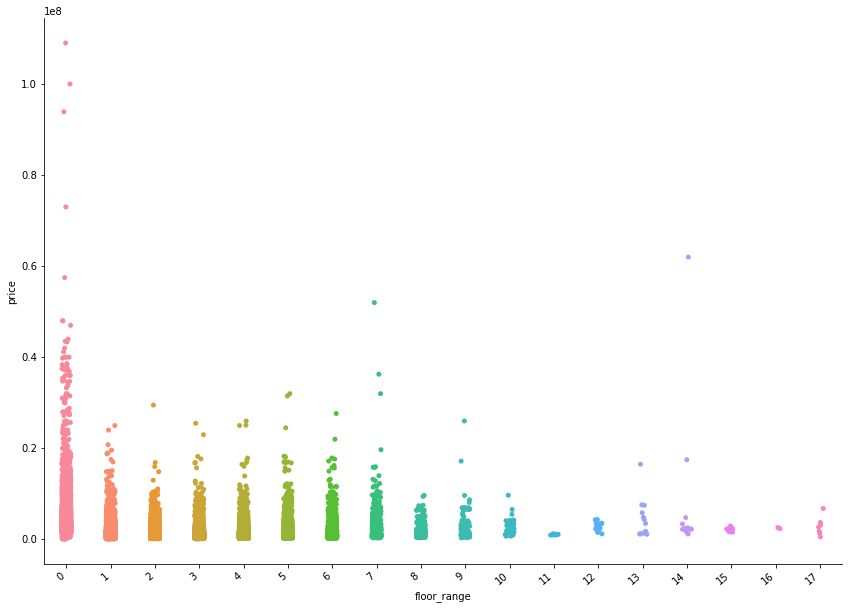

In [16]:
ax = sns.catplot(data=df, x='floor_range', y='price', height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation=40, ha="right")

#### 3.2 Multicollinearity

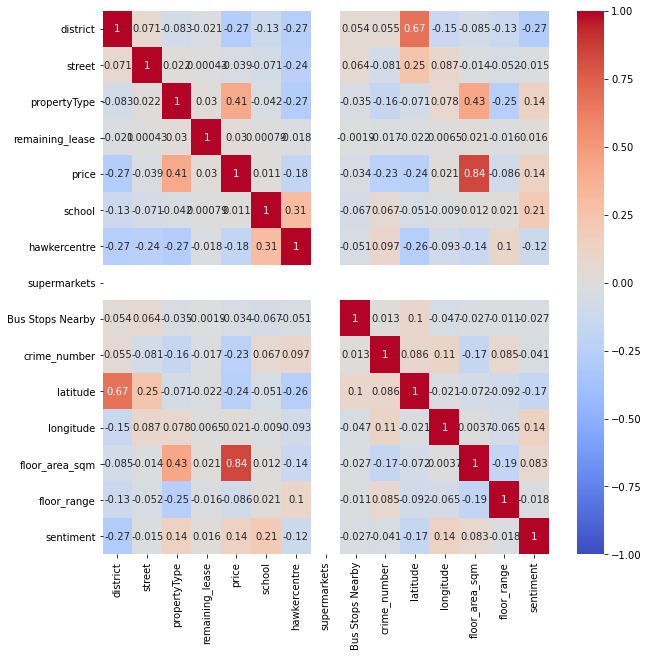

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

#### 3.3 Common Factors Affecting Price 

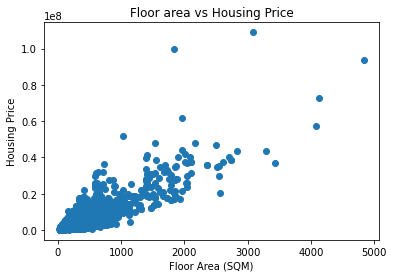

In [18]:
# Price and Square Meters of Flat
plt.scatter(df.floor_area_sqm, df.price)
plt.xlabel('Floor Area (SQM)')
plt.ylabel('Housing Price')
plt.title('Floor area vs Housing Price')
plt.show()

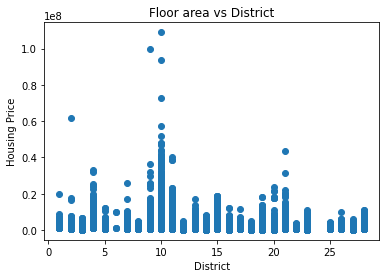

In [19]:
# Price and district of Flat
plt.scatter(df.district, df.price)
plt.xlabel('District')
plt.ylabel('Housing Price')
plt.title('Floor area vs District')
plt.show()

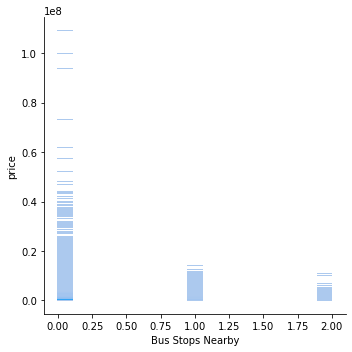

In [20]:
# Price and bus stops nearby
sns.displot(df, x="Bus Stops Nearby", y="price")

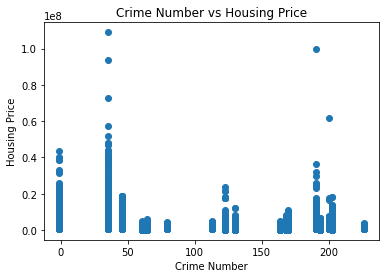

In [21]:
# Price and Crime Number
plt.scatter(df.crime_number, df.price)
plt.xlabel('Crime Number')
plt.ylabel('Housing Price')
plt.title('Crime Number vs Housing Price')
plt.show()

### 4. Linear Regression

In [22]:
print(X_train.shape)
print(X_test.shape)

(119346, 14)
(13261, 14)


In [23]:
X_train.isnull().any()

district            False
street              False
propertyType        False
remaining_lease     False
school              False
hawkercentre        False
supermarkets        False
Bus Stops Nearby    False
crime_number        False
latitude            False
longitude           False
floor_area_sqm      False
floor_range         False
sentiment           False
dtype: bool

In [24]:
from sklearn.linear_model import LinearRegression

# Creates a LinearRegression object (Ordinary least squares Linear Regression)
lm = LinearRegression()

# Convert both y_train and y_test back to series
y_train = y_train.squeeze()
y_test = y_test.squeeze()

lm.fit(X_train, y_train)

LinearRegression()

### 4.1 Calculate Metrics for Base Model

In [25]:
# Compute MSE
def mse(y_predicted, y_true):
    return np.mean(np.square(y_predicted - y_true))

mse_training = mse(lm.predict(X_train), y_train)
mse_testing = mse(lm.predict(X_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.22525719463984398, testing mse: 0.2013183912403879
training rmse: 0.4746126785494083, testing rmse: 0.44868518054465306


In [26]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(X_train, y_train), lm.score(X_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 
    1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))


training R2: 0.7747409179145696, testing R2: 0.7759827274198512
training adjusted R2: 0.7747144903546799, testing adjusted R2: 0.775745958446869


In [27]:
# Calculate MAE
from sklearn.metrics import mean_absolute_error

print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(X_train)),
    mean_absolute_error(y_test, lm.predict(X_test)),    
))

training MAE: 0.23909487132262167, testing MAE: 0.24202493478719642


### 4.2 Feature Cross

In [28]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

### 4.3 Error Metrics and Coefficients

In [30]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

lm.fit(OHE_train, y_train)

mse_training = mse(lm.predict(OHE_train), y_train)
mse_testing = mse(lm.predict(OHE_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.21053514174496135, testing mse: 0.1875850907944487
training rmse: 0.45884108550233527, testing rmse: 0.4331109451335174


In [31]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(OHE_train, y_train), lm.score(OHE_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1), 
    1 - (1-lm.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-OHE_test.shape[1]-1)))


training R2: 0.789463094166549, testing R2: 0.7912644733669928
training adjusted R2: 0.7894066277212608, testing adjusted R2: 0.7907595189632843


In [32]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(OHE_train)),
    mean_absolute_error(y_test, lm.predict(OHE_test)),    
))

training MAE: 0.22904990781328177, testing MAE: 0.2319686953810601


In [33]:
print(OHE_train.shape)
print()
print(y_train.shape)

(119346, 32)

(119346,)


In [34]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], lm.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,-2.542953e-02
1,street,-6.689782e-05
2,propertyType,9.683918e-03
3,remaining_lease,3.092414e-03
4,school,4.338689e-03
5,hawkercentre,-3.784808e-02
6,supermarkets,-2.386980e-15
7,Bus Stops Nearby,1.775866e-02
8,crime_number,-5.770625e-04
9,floor_area_sqm,7.796120e-01


### 5. Polynomial Regression and Error Metrics

In [35]:
from sklearn.preprocessing import PolynomialFeatures
pre_process = PolynomialFeatures(degree=2)

# Transform with OHE datasets
X_poly = pre_process.fit_transform(OHE_train)
X_test_poly = pre_process.transform(OHE_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

mse_training = mse(poly_model.predict(X_poly), y_train)
mse_testing = mse(poly_model.predict(X_test_poly), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.10177169262040965, testing mse: 0.07295842714553119
training rmse: 0.3190167591528847, testing rmse: 0.27010817674689375


In [36]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(poly_model.score(X_poly, y_train), 
                                               poly_model.score(X_test_poly, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-poly_model.score(X_poly, y_train))*(len(y_train)-1)/(len(y_train)-X_poly.shape[1]-1), 
    1 - (1-poly_model.score(X_test_poly, y_test))*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1)))


training R2: 0.8982274546275485, testing R2: 0.9188154258526553
training adjusted R2: 0.8977467973171873, testing adjusted R2: 0.9152289587216481


In [37]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, poly_model.predict(X_poly)),
    mean_absolute_error(y_test, poly_model.predict(X_test_poly)),    
))

training MAE: 0.12790064964671463, testing MAE: 0.12915275814411142


In [38]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], poly_model.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,9.399478e-09
1,street,-2.013736e-01
2,propertyType,7.236543e-06
3,remaining_lease,9.842174e-03
4,school,1.019999e+00
5,hawkercentre,-5.120727e-03
6,supermarkets,-7.732257e-02
7,Bus Stops Nearby,3.893612e-09
8,crime_number,-3.453809e-02
9,floor_area_sqm,2.922110e-03
